## Regressão Linear utilizando Sklearn

**Disciplina:** Inteligência Artificial

N1 | 2º bimestre | Curso: ECP | Turma: EC.9A.2020.S2

04/11/2020

**Prof.:** Rodrigo T. Fontes | **Coord.:** Michele Bazana

**Aluno:** Caio Favoretto        **RA:** 082170041

**Aluno:** Kaique Cirto          **RA:** 082160029

**Aluno:** Matheus Boareto       **RA:** 082160025

**Aluno:** William Rocha         **RA:** 082160033

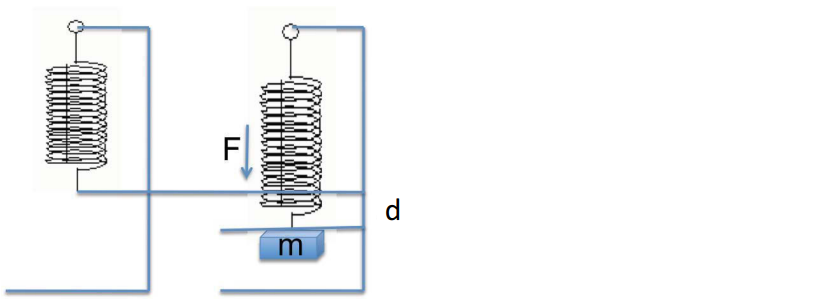

### F = -kd

## Base de dados :

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
obj = {'Distância (m)': [0.0865,0.1015,0.1106,0.1279,0.1892,0.2695,
                         0.2888,0.2425,0.3465,0.3225,0.3764,0.4263,
                         0.4562,0.4491,0.4489,0.4501,0.4392,0.4295,0.4323,], 
       'Massa (kg)': [0.10,0.15,0.20,0.25,0.30,0.35,
                      0.40,0.45,0.50,0.55,0.60,0.65,
                      0.70,0.75,0.80,0.85,0.90,0.95,1.00,]
      }

In [15]:
df = pd.DataFrame(data=obj)

# F = -kd
# -k = F/d
# -k = (m*a)/d

F = (df["Massa (kg)"] * 9.8)
d = df["Distância (m)"]
df["-k"] = -(F/d)

df

,Distância (m),Massa (kg),-k
0,0.0865,0.10,-11.329480
1,0.1015,0.15,-14.482759
2,0.1106,0.20,-17.721519
3,0.1279,0.25,-19.155590
4,0.1892,0.30,-15.539112
5,0.2695,0.35,-12.727273
6,0.2888,0.40,-13.573407
7,0.2425,0.45,-18.185567
8,0.3465,0.50,-14.141414
9,0.3225,0.55,-16.713178


## Análise exploratória da base de dados :

In [11]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

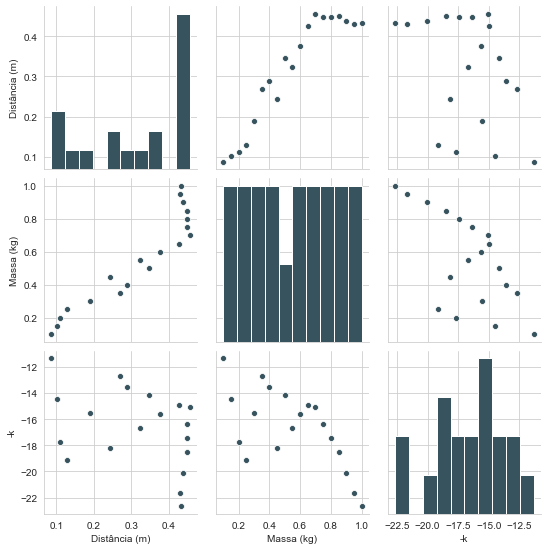

In [15]:
sns.pairplot(df)

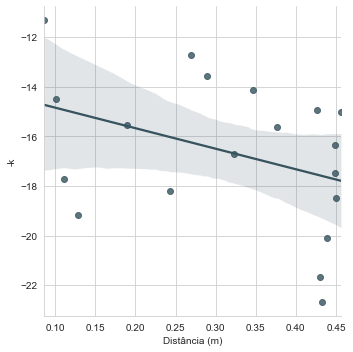

In [13]:
sns.lmplot(x='Distância (m)', y='-k', data=df)

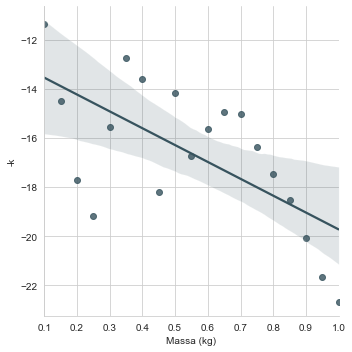

In [14]:
sns.lmplot(x='Massa (kg)',y='-k',data=df)

# 1. Modelo para estimar `-k`

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df[["Distância (m)", "Massa (kg)"]]
Y = df["-k"]

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(13, 2)
(6, 2)
(13,)
(6,)


### 1) (3,5 pontos) um programa ou algoritmo escrito em Python (Jupyter Notebook), que implemente e informe o cálculo de k;

### 1.1 Treino

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm = LinearRegression()

In [23]:
lm.fit(X_train, Y_train)

LinearRegression()

In [24]:
# Coeficientes 'w' do modelo
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeficiente']
coeffecients

,Coeficiente
Distância (m),39.695229
Massa (kg),-24.358354


In [25]:
print('Bias:', lm.intercept_)

Bias: -15.795812394970492


### Função

- d = Distância (m)
- m = Massa (kg)

**-k = (39.695229 * d) + (-24.358354 * d) -15.795812394970492**

### 2) (3,5 pontos) a explicação do grau de confiabilidade do modelo de estimativa desenvolvido;

O grau de confiabilidade do modelo se dá pelas métricas de erro das estimativas feitas, em relação a base de teste.
As métricas utilizadas foram:

- MAE - Mean Absolute Error
- MSE - Mean Squared Error
- RMSE - Root Mean Squared Error

Os quais apresentaram um valor baixo. Apesar de serem poucos dados de amostra.

### 1.2 Teste

In [63]:
predictions = lm.predict(X_test)
predictions

array([-16.80838093, -17.46330671, -15.42049963, -16.27719072,
       -14.7980104 , -20.28418579])

Text(0, 0.5, 'Y estimado')

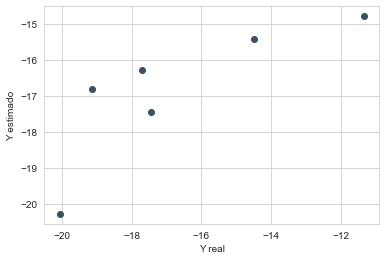

In [64]:
plt.scatter(Y_test,predictions)
plt.xlabel('Y real')
plt.ylabel('Y estimado')

In [65]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 1.4002725642700227
MSE: 3.4244056451841303
RMSE: 1.8505149675655506


### 3) (3,0 pontos) uma recomendação ou sugestão de melhoria do processo.

A sugestão como melhoria do processo é que mais dados fossem coletados, com o objetivo de explorar novas variáveis que pudessem ser utilizadas para estimar o coeficiente k com mais precisão.